In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
import pandas as pd
import io
from google.colab import files

# 1. This triggers a button to upload a file from your computer
uploaded = files.upload()

# 2. Get the filename of the file you just uploaded
filename = next(iter(uploaded))

# 3. Read the content using io.BytesIO
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preview
data.head()


Saving train.csv to train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Drop columns that are not useful for prediction
columns_to_drop = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
data = data.drop(columns=columns_to_drop, axis=1)
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)
# Fill missing numerical values with the median of the respective columns
data = data.fillna(data.median())
# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [9]:
# Step 5: Split the Dataset into Training and Testing Sets
# Use an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [10]:
#Step 6: Train the Linear Regression Model
# Initialize the Linear Regression model
model = LinearRegression()

In [11]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step 7: Make Predictions
# Predict on the test set
y_pred = model.predict(X_test)

In [13]:
# Step 8: Evaluate the Model's Performance
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 20584.17956045605
Mean Squared Error (MSE): 2729610891.2504044
R-squared (R²): 0.6441336629604164


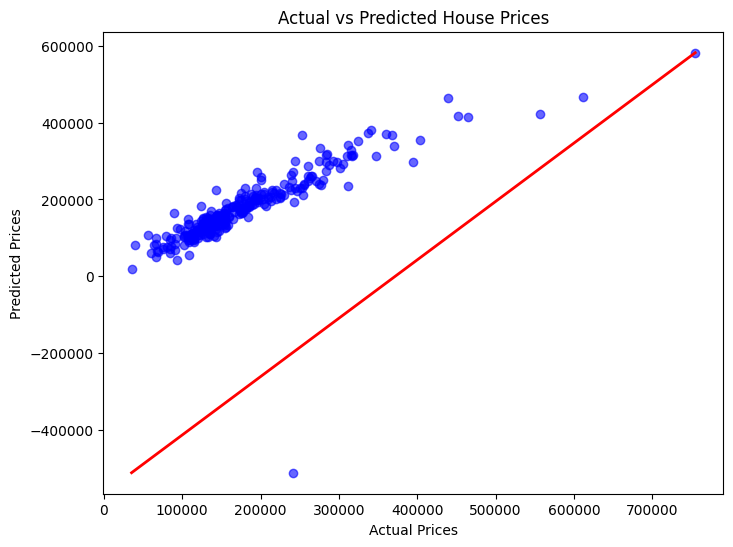

In [16]:
# STEP 9: VISUALIZE THE RESULTS
# Plot actual vs predicted house prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],
color='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [18]:
#Using another regression model: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Step 6: Train the Random Forest Regression Model
# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Step 7: Make Predictions
# Predict on the test set
y_pred = model.predict(X_test)

In [21]:
# Step 8: Evaluate the Model's Performance
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 17429.145479452054
Mean Squared Error (MSE): 816187827.3081173
R-squared (R²): 0.8935915102876139
